Exectue the following cells to install and import the necessary libraries.


In [1]:
!pip install numpy
!pip install pandas
!pip install matplotlib
!pip install scikit-learn
!pip install seaborn

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
import seaborn as sns

## Load the data


In [2]:
url="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/_0eYOqji3unP1tDNKWZMjg/weatherAUS-2.csv"
df = pd.read_csv(url)
df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


In [3]:
df.count()

Date             145460
Location         145460
MinTemp          143975
MaxTemp          144199
Rainfall         142199
Evaporation       82670
Sunshine          75625
WindGustDir      135134
WindGustSpeed    135197
WindDir9am       134894
WindDir3pm       141232
WindSpeed9am     143693
WindSpeed3pm     142398
Humidity9am      142806
Humidity3pm      140953
Pressure9am      130395
Pressure3pm      130432
Cloud9am          89572
Cloud3pm          86102
Temp9am          143693
Temp3pm          141851
RainToday        142199
RainTomorrow     142193
dtype: int64

In [4]:
df.shape

(145460, 23)

###### Drop all rows with missing values


In [5]:
df = df.dropna()
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 56420 entries, 6049 to 142302
Data columns (total 23 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           56420 non-null  object 
 1   Location       56420 non-null  object 
 2   MinTemp        56420 non-null  float64
 3   MaxTemp        56420 non-null  float64
 4   Rainfall       56420 non-null  float64
 5   Evaporation    56420 non-null  float64
 6   Sunshine       56420 non-null  float64
 7   WindGustDir    56420 non-null  object 
 8   WindGustSpeed  56420 non-null  float64
 9   WindDir9am     56420 non-null  object 
 10  WindDir3pm     56420 non-null  object 
 11  WindSpeed9am   56420 non-null  float64
 12  WindSpeed3pm   56420 non-null  float64
 13  Humidity9am    56420 non-null  float64
 14  Humidity3pm    56420 non-null  float64
 15  Pressure9am    56420 non-null  float64
 16  Pressure3pm    56420 non-null  float64
 17  Cloud9am       56420 non-null  float64
 18  Cloud3p

we still have 56k observations left after dropping missing values, we might not need imputing.  


In [6]:
df.columns

Index(['Date', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation',
       'Sunshine', 'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RainTomorrow'],
      dtype='object')

In [8]:
## I want to predict for today so chanhing 
df = df.rename(columns={'RainToday': 'RainYesterday',
                        'RainTomorrow': 'RainToday'
                        })

The chance of rain in one location can be much higher than in another. 
Using all of the locations requires a more complex model as it needs to adapt to local weather patterns.  


In [9]:
df['Location'].value_counts()

Location
Darwin              3062
Perth               3025
Brisbane            2953
MelbourneAirport    2929
PerthAirport        2913
SydneyAirport       2870
Watsonia            2730
Mildura             2594
MountGambier        2465
NorfolkIsland       2464
Cairns              2444
Townsville          2419
WaggaWagga          2416
AliceSprings        2223
Nuriootpa           2008
Hobart              1939
Moree               1913
Melbourne           1898
Portland            1863
Woomera             1734
Sydney              1690
Sale                1678
CoffsHarbour        1380
Williamtown         1198
Canberra            1078
Cobar                534
Name: count, dtype: int64

##### Location selection
Melbourne area

In [10]:
df = df[df.Location.isin(['Melbourne','MelbourneAirport','Watsonia',])]
df. info()

<class 'pandas.core.frame.DataFrame'>
Index: 7557 entries, 64191 to 80997
Data columns (total 23 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           7557 non-null   object 
 1   Location       7557 non-null   object 
 2   MinTemp        7557 non-null   float64
 3   MaxTemp        7557 non-null   float64
 4   Rainfall       7557 non-null   float64
 5   Evaporation    7557 non-null   float64
 6   Sunshine       7557 non-null   float64
 7   WindGustDir    7557 non-null   object 
 8   WindGustSpeed  7557 non-null   float64
 9   WindDir9am     7557 non-null   object 
 10  WindDir3pm     7557 non-null   object 
 11  WindSpeed9am   7557 non-null   float64
 12  WindSpeed3pm   7557 non-null   float64
 13  Humidity9am    7557 non-null   float64
 14  Humidity3pm    7557 non-null   float64
 15  Pressure9am    7557 non-null   float64
 16  Pressure3pm    7557 non-null   float64
 17  Cloud9am       7557 non-null   float64
 18  Cloud3pm

### Create a function to map dates to seasons


In [11]:
def date_to_season(date):
    month = date.month
    if (month == 12) or (month == 1) or (month == 2):
        return 'Summer'
    elif (month == 3) or (month == 4) or (month == 5):
        return 'Autumn'
    elif (month == 6) or (month == 7) or (month == 8):
        return 'Winter'
    elif (month == 9) or (month == 10) or (month == 11):
        return 'Spring'

In [12]:
import warnings
warnings.filterwarnings('ignore')

In [13]:
# Write your response.
df['Date'] = pd.to_datetime(df['Date'])

df['Season'] = df['Date'].apply(date_to_season)

df = df.drop(columns = 'Date')
df.head()

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainYesterday,RainToday,Season
64191,MelbourneAirport,11.2,19.9,0.0,5.6,8.8,SW,69.0,W,SW,...,37.0,1005.1,1006.4,7.0,7.0,15.9,18.1,No,Yes,Summer
64192,MelbourneAirport,7.8,17.8,1.2,7.2,12.9,SSE,56.0,SW,SSE,...,43.0,1018.0,1019.3,6.0,7.0,12.5,15.8,Yes,No,Summer
64193,MelbourneAirport,6.3,21.1,0.0,6.2,10.5,SSE,31.0,E,S,...,35.0,1020.8,1017.6,1.0,7.0,13.4,19.6,No,No,Summer
64194,MelbourneAirport,8.1,29.2,0.0,6.4,12.5,SSE,35.0,NE,SSE,...,23.0,1016.2,1012.8,5.0,4.0,16.0,28.2,No,No,Summer
64195,MelbourneAirport,9.7,29.0,0.0,7.4,12.3,SE,33.0,SW,SSE,...,31.0,1011.9,1010.3,6.0,2.0,19.4,27.1,No,No,Summer


In [14]:
# Write your response.
X = df.drop(columns = 'RainToday', axis = 1)

y = df['RainToday']

In [15]:
# Write your response.
## checking target class balance
y.value_counts()

RainToday
No     5766
Yes    1791
Name: count, dtype: int64

In [16]:
# Write your response.
## Splliting the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 42, stratify = y)

##### Defining preprocessing transformers for numerical and categorical features


In [17]:
# Write your response.

num_features = X_train.select_dtypes(include = ['number']).columns.tolist()

cat_features = X_train.select_dtypes(include = ['object']).columns.tolist()

### Define separate transformers for both feature types and combine them into a single preprocessing transformer


In [18]:
# Scale the numeric features

## Imputer we don't need here, because it would replace null values with imputer, we don't have so no need
num_transformer = Pipeline(steps=[('scaler', StandardScaler())])

# One-hot encode the categoricals 
cat_transformer = Pipeline(steps=[('onehot', OneHotEncoder(handle_unknown='ignore'))])

Pipeline(steps=[('onehot', OneHotEncoder(handle_unknown='ignore'))])

In [19]:
# Write your response.

## Combining both transformers
preprocessing = ColumnTransformer(

    transformers= [
        ('num', num_transformer, num_features),
        ('cat', cat_transformer, cat_features)
    ]
)

In [23]:
# Write your response.

## Creating a pipeline 
pipeline = Pipeline(steps = [
    ('preprocessor', preprocessing),
    ('classifier', RandomForestClassifier(random_state = 42))
])


### Define a parameter grid to use in a cross validation grid search model optimizer


In [24]:
param_grid = {
    'classifier__n_estimators':[50, 100, 150],
    'classifier__max_depth':[None, 10, 20],
    'classifier__min_samples_split':[2, 4,  5]
    
}

###### Pipeline usage in crossvalidation


In [25]:
cv = StratifiedKFold(n_splits=5, shuffle=True)

In [26]:
### Write your response.

model = GridSearchCV(estimator = pipeline, param_grid = param_grid, cv = cv, scoring = "accuracy", verbose = 2)
### Write your response.2
model.fit(X_train, y_train)

Fitting 5 folds for each of 27 candidates, totalling 135 fits
[CV] END classifier__max_depth=None, classifier__min_samples_split=2, classifier__n_estimators=50; total time=   0.7s
[CV] END classifier__max_depth=None, classifier__min_samples_split=2, classifier__n_estimators=50; total time=   0.7s
[CV] END classifier__max_depth=None, classifier__min_samples_split=2, classifier__n_estimators=50; total time=   0.7s
[CV] END classifier__max_depth=None, classifier__min_samples_split=2, classifier__n_estimators=50; total time=   0.7s
[CV] END classifier__max_depth=None, classifier__min_samples_split=2, classifier__n_estimators=50; total time=   0.6s
[CV] END classifier__max_depth=None, classifier__min_samples_split=2, classifier__n_estimators=100; total time=   1.3s
[CV] END classifier__max_depth=None, classifier__min_samples_split=2, classifier__n_estimators=100; total time=   1.4s
[CV] END classifier__max_depth=None, classifier__min_samples_split=2, classifier__n_estimators=100; total time

[CV] END classifier__max_depth=10, classifier__min_samples_split=4, classifier__n_estimators=100; total time=   0.9s
[CV] END classifier__max_depth=10, classifier__min_samples_split=4, classifier__n_estimators=150; total time=   1.5s
[CV] END classifier__max_depth=10, classifier__min_samples_split=4, classifier__n_estimators=150; total time=   1.4s
[CV] END classifier__max_depth=10, classifier__min_samples_split=4, classifier__n_estimators=150; total time=   1.4s
[CV] END classifier__max_depth=10, classifier__min_samples_split=4, classifier__n_estimators=150; total time=   1.4s
[CV] END classifier__max_depth=10, classifier__min_samples_split=4, classifier__n_estimators=150; total time=   1.3s
[CV] END classifier__max_depth=10, classifier__min_samples_split=5, classifier__n_estimators=50; total time=   0.4s
[CV] END classifier__max_depth=10, classifier__min_samples_split=5, classifier__n_estimators=50; total time=   0.4s
[CV] END classifier__max_depth=10, classifier__min_samples_split=5

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=True),
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('num',
                                                                         Pipeline(steps=[('scaler',
                                                                                          StandardScaler())]),
                                                                         ['MinTemp',
                                                                          'MaxTemp',
                                                                          'Rainfall',
                                                                          'Evaporation',
                                                                          'Sunshine',
                                                                          'WindGustSpeed',
                                                                          'WindSpeed9am',
                                                                          'WindSpeed3pm',
                                                                          'Humidity9am',
                                                                          'Humidity3pm',
                                                                          'Pressure9am',
                                                                          'Pr...
                                                                         Pipeline(steps=[('onehot',
                                                                                          OneHotEncoder(handle_unknown='ignore'))]),
                                                                         ['Location',
                                                                          'WindGustDir',
                                                                          'WindDir9am',
                                                                          'WindDir3pm',
                                                                          'RainYesterday',
                                                                          'Season'])])),
                                       ('classifier',
                                        RandomForestClassifier(random_state=42))]),
             param_grid={'classifier__max_depth': [None, 10, 20],
                         'classifier__min_samples_split': [2, 4, 5],
                         'classifier__n_estimators': [50, 100, 150]},
             scoring='accuracy', verbose=2)

### Print the best parameters and best crossvalidation score


In [29]:
print("\nBest parameters found: ", model.best_params_)
print("Best cross-validation score: {:.2f}".format(model.best_score_))


Best parameters found:  {'classifier__max_depth': 20, 'classifier__min_samples_split': 2, 'classifier__n_estimators': 150}
Best cross-validation score: 0.85


In [30]:
## Write your response.


best_test_score = model.score(X_test, y_test)
print("Test set score: {:.2f}".format(best_test_score))

Test set score: 0.85


In [31]:
### Write your response.
y_pred = model.predict(X_test)
y_pred

array(['No', 'No', 'Yes', ..., 'No', 'No', 'No'], dtype=object)

In [32]:
## Write your response.
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Classification Report:
              precision    recall  f1-score   support

          No       0.87      0.95      0.91      1442
         Yes       0.76      0.53      0.62       448

    accuracy                           0.85      1890
   macro avg       0.81      0.74      0.77      1890
weighted avg       0.84      0.85      0.84      1890



In [36]:
import numpy as np

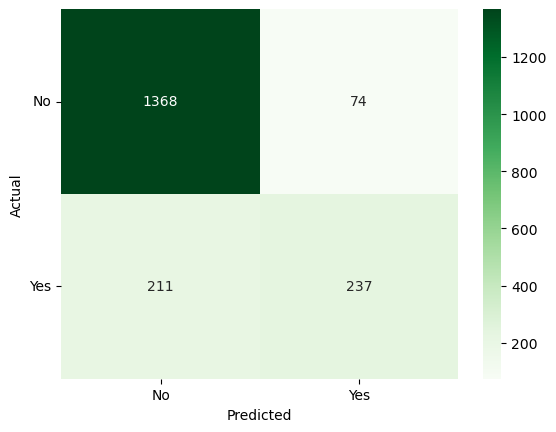

In [41]:
## Write your response.

conf_matrix = confusion_matrix(y_test, y_pred)

ax = sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Greens')
#sns.heatmap(conf_matrix, annot=True, fmt='.0f', cmap='Greens')

plt.xlabel("Predicted")
plt.ylabel("Actual")

class_labels = ['No', 'Yes']
ax.set_xticks(np.arange(len(class_labels)) + 0.5)
ax.set_yticks(np.arange(len(class_labels)) + 0.5)
# Assign labels to ticks
ax.set_xticklabels(class_labels, ha='center')
ax.set_yticklabels(class_labels, va='center', rotation=0)

plt.show()

In [42]:
from sklearn.metrics import recall_score

y_test_mapped = (y_test == 'Yes').astype(int)
y_pred_mapped = (y_pred == 'Yes').astype(int)

print(recall_score(y_test_mapped, y_pred_mapped, pos_label=1))


0.5290178571428571


In [74]:
(237 /(211+237))* 100//1

52.0

<details><summary>Click here for Hints</summary>

Consider the confusion matrix or the classification report and claculate the true positve rate given the information.
    
</details> 


###### Feature importances


In [47]:
## Write your response.

feature_importances = model.best_estimator_['classifier'].feature_importances_
z = list(model.best_estimator_['preprocessor']
                                        .named_transformers_['cat']
                                        .named_steps['onehot']
                                        .get_feature_names_out(cat_features))

Now let's extract the feature importances and plot them as a bar graph.


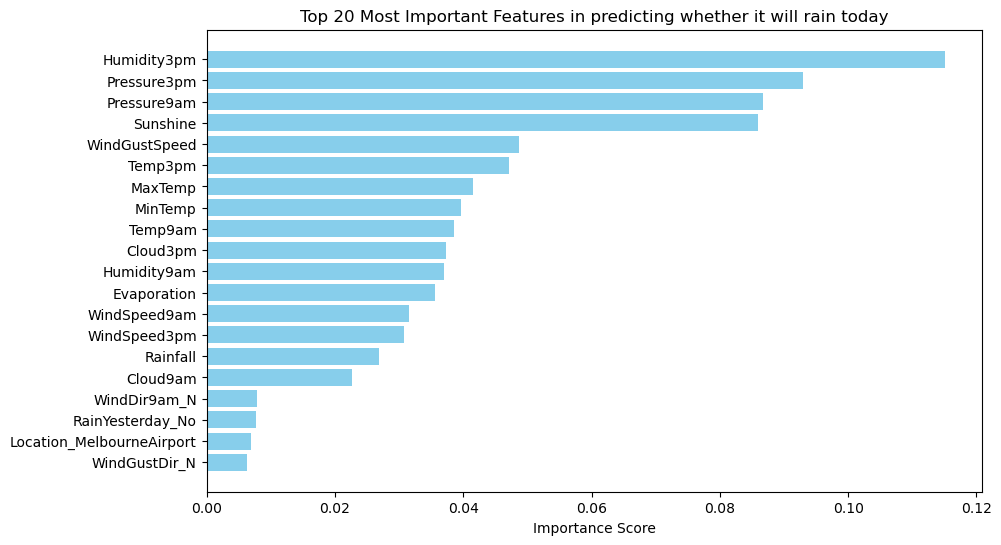

In [50]:
# Combining numeric and categorical feature names
feature_names = num_features + z

feature_importances = model.best_estimator_['classifier'].feature_importances_

N = 20

importance_df = pd.DataFrame({'Feature': feature_names,
                              'Importance': feature_importances
                             }).sort_values(by='Importance', ascending=False)

top_features = importance_df.head(N)


# Plotting
plt.figure(figsize=(10, 6))
plt.barh(top_features['Feature'], top_features['Importance'], color='skyblue')
plt.gca().invert_yaxis()  # Invert y-axis to show the most important feature on top
plt.title(f'Top {N} Most Important Features in predicting whether it will rain today')
plt.xlabel('Importance Score')
plt.show()

In [ ]:
Index(['Date', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation',
       'Sunshine', 'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RainTomorrow'],
      dtype='object')

Identify the most important feature for predicting whether it will rain based on the feature importance bar graph. 
##### Humidity 3pm

#### Another model


In [52]:
## Write your response
## Rewriting the parameter for gridsearchh and model fitting
pipeline.set_params(classifier = LogisticRegression(random_state = 42))

param_grid = {
    'classifier__solver': ['liblinear'],
    'classifier__penalty': ['l1', 'l2'],
    'classifier__class_weight': [None, 'balanced']
}

In [53]:
model.estimator = pipeline
model.param_grid = param_grid

In [54]:
model.fit(X_train, y_train)

y_pred = model.predict(X_test)



Fitting 5 folds for each of 4 candidates, totalling 20 fits
[CV] END classifier__class_weight=None, classifier__penalty=l1, classifier__solver=liblinear; total time=   0.3s
[CV] END classifier__class_weight=None, classifier__penalty=l1, classifier__solver=liblinear; total time=   0.1s
[CV] END classifier__class_weight=None, classifier__penalty=l1, classifier__solver=liblinear; total time=   0.1s
[CV] END classifier__class_weight=None, classifier__penalty=l1, classifier__solver=liblinear; total time=   0.1s
[CV] END classifier__class_weight=None, classifier__penalty=l1, classifier__solver=liblinear; total time=   0.0s
[CV] END classifier__class_weight=None, classifier__penalty=l2, classifier__solver=liblinear; total time=   0.0s
[CV] END classifier__class_weight=None, classifier__penalty=l2, classifier__solver=liblinear; total time=   0.0s
[CV] END classifier__class_weight=None, classifier__penalty=l2, classifier__solver=liblinear; total time=   0.0s
[CV] END classifier__class_weight=No

In [55]:
print(classification_report(y_test, y_pred))
print()
print("Best parameters: ", model.best_params_)
print("Best score: ", model.best_score_)


              precision    recall  f1-score   support

          No       0.86      0.92      0.89      1442
         Yes       0.68      0.51      0.58       448

    accuracy                           0.83      1890
   macro avg       0.77      0.72      0.73      1890
weighted avg       0.81      0.83      0.82      1890


Best parameters:  {'classifier__class_weight': None, 'classifier__penalty': 'l2', 'classifier__solver': 'liblinear'}
Best score:  0.8348308170314642


#####  Comparing the results to the previous model.


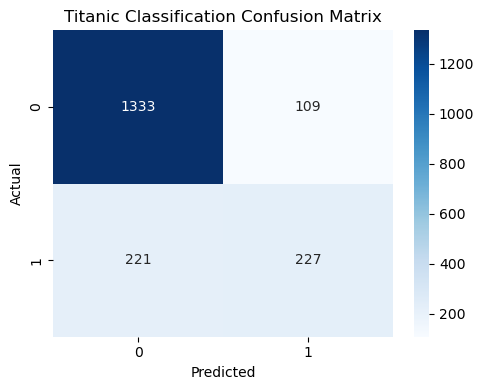

In [60]:

# Generate the confusion matrix 
conf_matrix = confusion_matrix(y_test, y_pred)

plt.figure(figsize = (5, 4))
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='d')

# Set the title and labels
plt.title('Titanic Classification Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')

# Show the plot
plt.tight_layout()
plt.show()

What can you conclude about the model performances? 


In [61]:
## The Random forest classifier performed bettter than Logistic Regression

In [63]:
model.score(X_test, y_test)

0.8253968253968254

In [62]:
from sklearn.metrics import recall_score

y_test_mapped = (y_test == 'Yes').astype(int)
y_pred_mapped = (y_pred == 'Yes').astype(int)

print("recall score for logistic regression: ", recall_score(y_test_mapped, y_pred_mapped, pos_label=1))


recall score for logistic regression:  0.5066964285714286


In [73]:
recall_score(y_test_mapped, y_pred_mapped, pos_label=1) * 100

50.66964285714286

###### Comparing the accuracy and true positive rate of rainfall predictions between the LogisticRegression model and the RandomForestClassifier model.

##### Model Accuracy Score
RandomForestClassifier Accuracy - 0.85

Logistic Regression Accuracy    - 0.83

##### True Positive Rate
RandomForestClassifier Accuracy - 53%

Logistic Regression Accuracy    - 50%



The RandomForestClassifier Model performed better than Logistic Regression in getting both higher accuracy and higher true postive rate 